In [50]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # Random Forest model
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.tree import DecisionTreeRegressor  # Decision Tree model
from sklearn.svm import SVR  # Support Vector Regression model
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors model
from sklearn.metrics import mean_squared_error  # For evaluating model performance
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
from tabulate import tabulate  # For displaying tables in a formatted way
from sklearn.preprocessing import StandardScaler  # For feature scaling

In [51]:
# Load the dataset
df = pd.read_csv('New GB.csv')  # Read the CSV file into a DataFrame
df  # Display the DataFrame
df.head(5)

,Country Name,Country Code,Parameters,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,India,IND,Current account balance (% of GDP),..,..,..,-0.15,1.54,1.74,0.5,0.03,-0.96,-1.39,-1.26,-0.89,-1.09,-1.78,-1.83,-1.85,-2.41,-2.3,-2.19,-1.59,-1.56,-0.67,-0.51,-1.54,-1.5,-0.71,-1.6,-0.7,-0.98,0.29,1.4,1.4,0.11,-1.2,-0.99,-0.66,-2.6,-1.9,-3.2,-3.4,-5,-2.6,-1.3,-1.1,-0.53,-1.4,-2.4,-1.1,1.2,-1.1,-2.36
1,Russian Federation,RUS,Current account balance (% of GDP),..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,2.26,1.88,2.6,-0.21,0.03,12,17,10,8,7.7,9.9,11,9.3,5.5,6.3,4.1,4.4,4.8,3.2,1.5,2.8,5,1.9,2,7,3.9,2.4,6.8,10.49
2,China,CHN,Current account balance (% of GDP),..,..,..,..,..,..,..,..,..,..,2.77,1.84,0.78,-3.69,-2.34,0.11,-1.22,-1.24,3.32,3.46,1.5,-2.61,1.22,0.22,0.84,3.8,3.1,1.9,1.7,1.3,2.4,2.6,3.5,5.8,8.4,9.9,9.2,4.8,3.9,1.8,2.5,1.6,2.2,2.6,1.7,1.5,0.17,0.72,1.7,2,2.48
3,South Africa,ZAF,Current account balance (% of GDP),-0.78,-0.78,-3.47,-5.59,-4.65,0.53,2.13,4.7,3.54,-5.34,-4.1,-0.34,-2.3,3.51,3.77,5.29,2.44,1.39,1.23,1.03,1.35,1.9,0.02,-1.45,-1,-1.3,-1.4,-0.45,-0.13,0.25,0.78,-0.78,-2.5,-2.8,-4,-4.9,-5.2,-2.4,-1.3,-2,-4.7,-5.3,-4.8,-4.3,-2.6,-2.4,-3,-2.6,2,3.7,-0.42
4,Brazil,BRA,Current account balance (% of GDP),..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.24,-0.99,-0.42,1.86,0.01,-0.22,-2.36,-2.7,-3.6,-4,-4.5,-4,-4.4,-1.9,0.39,1.3,1.3,0.97,-0.2,-2.1,-1.8,-3.9,-3.2,-3.8,-3.6,-4.5,-3.5,-1.7,-1.2,-2.9,-3.6,-1.9,-2.8,-2.47


In [52]:
# Check for missing values in the DataFrame
df.isna()

,Country Name,Country Code,Parameters,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
# Display the data types of each column in the DataFrame
df.dtypes

Country Name     object
Country Code     object
Parameters       object
1972             object
1973             object
1974             object
1975             object
1976             object
1977             object
1978             object
1979             object
1980             object
1981             object
1982             object
1983             object
1984             object
1985             object
1986             object
1987             object
1988             object
1989             object
1990             object
1991             object
1992             object
1993             object
1994             object
1995             object
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            

In [54]:
# Convert year columns (1972-2022) to numeric types for analysis
for col in range(1972, 2023):
    df[str(col)] = pd.to_numeric(df[str(col)], errors='coerce')  # Convert columns to numeric, coercing errors

# Select the columns from 1972 to 2022
cols = [str(i) for i in range(1972, 2023)]

# Define a function to calculate the mean of non-null values in each row
def fill_with_row_mean(row):
    non_null_values = row[cols][~row[cols].isnull()]  # Get non-null values for the specified columns
    if len(non_null_values) > 0:
        return round(non_null_values.mean(), 2)  # Return the mean rounded to 2 decimal places
    else:
        return 0.00  # Return a default value if no non-null values are found

# Apply the function to fill null values
df[cols] = df[cols].apply(lambda x: x.fillna(df.apply(fill_with_row_mean, axis=1)), axis=0)

# Format the columns to display two decimal places without scientific notation
pd.options.display.float_format = '{:.2g}'.format

# Display the first 5 rows of the DataFrame
df.head(5)

,Country Name,Country Code,Parameters,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,India,IND,Current account balance (% of GDP),-1.1,-1.1,-1.1,-0.15,1.5,1.7,0.5,0.03,-0.96,-1.4,-1.3,-0.89,-1.1,-1.8,-1.8,-1.9,-2.4,-2.3,-2.2,-1.6,-1.6,-0.67,-0.51,-1.5,-1.5,-0.71,-1.6,-0.7,-0.98,0.29,1.4,1.4,0.11,-1.2,-0.99,-0.66,-2.6,-1.9,-3.2,-3.4,-5,-2.6,-1.3,-1.1,-0.53,-1.4,-2.4,-1.1,1.2,-1.1,-2.4
1,Russian Federation,RUS,Current account balance (% of GDP),5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,2.3,1.9,2.6,-0.21,0.03,12,17,10,8,7.7,9.9,11,9.3,5.5,6.3,4.1,4.4,4.8,3.2,1.5,2.8,5,1.9,2,7,3.9,2.4,6.8,10
2,China,CHN,Current account balance (% of GDP),2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.8,1.8,0.78,-3.7,-2.3,0.11,-1.2,-1.2,3.3,3.5,1.5,-2.6,1.2,0.22,0.84,3.8,3.1,1.9,1.7,1.3,2.4,2.6,3.5,5.8,8.4,9.9,9.2,4.8,3.9,1.8,2.5,1.6,2.2,2.6,1.7,1.5,0.17,0.72,1.7,2,2.5
3,South Africa,ZAF,Current account balance (% of GDP),-0.78,-0.78,-3.5,-5.6,-4.7,0.53,2.1,4.7,3.5,-5.3,-4.1,-0.34,-2.3,3.5,3.8,5.3,2.4,1.4,1.2,1,1.4,1.9,0.02,-1.4,-1,-1.3,-1.4,-0.45,-0.13,0.25,0.78,-0.78,-2.5,-2.8,-4,-4.9,-5.2,-2.4,-1.3,-2,-4.7,-5.3,-4.8,-4.3,-2.6,-2.4,-3,-2.6,2,3.7,-0.42
4,Brazil,BRA,Current account balance (% of GDP),-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,-1.9,0.24,-0.99,-0.42,1.9,0.01,-0.22,-2.4,-2.7,-3.6,-4,-4.5,-4,-4.4,-1.9,0.39,1.3,1.3,0.97,-0.2,-2.1,-1.8,-3.9,-3.2,-3.8,-3.6,-4.5,-3.5,-1.7,-1.2,-2.9,-3.6,-1.9,-2.8,-2.5


In [55]:
# Select the columns from 1972 to 2022 again (redundant, can be removed)
cols = [str(i) for i in range(1972, 2023)]

# Group by country and get the min and max values for each categorical column
country_ranges = df.groupby('Parameters')[cols].agg(['min', 'max'])  # Aggregate min and max values

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Print the results of min and max values
country_ranges

1972            1973  \
                                                       min     max     min   
Parameters                                                                   
Current account balance (% of GDP)                    -2.1     5.7    -1.9   
Fertility rate, total (births per woman)               1.7     5.5     1.5   
Foreign direct investment, net inflows (% of GDP)     0.02     2.6   -0.01   
Foreign direct investment, net outflows (% of GDP)    0.07     1.8    0.16   
GDP (current US$)                                  2.5e+10 1.3e+12 3.3e+10   
GDP growth (annual %)                                -0.55      12    0.81   
GDP per capita (current US$)                       1.2e+02 7.1e+03 1.4e+02   
GDP per capita growth (annual %)                      -2.7     9.2    0.84   
Gross savings (% of GDP)                                18      42      18   
Imports of goods and services (% of GDP)               2.6      22     3.8   
Inflation, consumer prices (annual %)                  3.3 2.8e+02     4.8   
Population ages 65 and above (% of total popula...     3.3      14     3.4   
Population growth (annual %)                          0.34     2.9    0.19   
Population, total                                  2.2e+07 8.6e+08 2.2e+07   
Unemployment, total (% of total labor force) (m...     3.7      22     3.7   

                                                              1974          \
                                                       max     min     max   
Parameters                                                                   
Current account balance (% of GDP)                     5.7    -4.1     5.7   
Fertility rate, total (births per woman)               5.4     1.5     5.3   
Foreign direct investment, net inflows (% of GDP)      2.6    0.04     2.6   
Foreign direct investment, net outflows (% of GDP)     2.6     0.1     2.1   
GDP (current US$)                                  1.4e+12 4.1e+10 1.6e+12   
GDP growth (annual %)                                   14    -2.5     8.2   
GDP per capita (current US$)                       7.1e+03 1.6e+02 7.2e+03   
GDP per capita growth (annual %)                        11    -2.5     5.6   
Gross savings (% of GDP)                                42      18      42   
Imports of goods and services (% of GDP)                25     5.3      32   
Inflation, consumer prices (annual %)              2.8e+02     4.8 2.8e+02   
Population ages 65 and above (% of total popula...      14     3.4      15   
Population growth (annual %)                           2.9    0.04     2.8   
Population, total                                  8.8e+08 2.3e+07   9e+08   
Unemployment, total (% of total labor force) (m...      22     3.7      22   

                                                      1975            1976  \
                                                       min     max     min   
Parameters                                                                   
Current account balance (% of GDP)                    -5.6     5.7    -4.7   
Fertility rate, total (births per woman)               1.4     5.2     1.4   
Foreign direct investment, net inflows (% of GDP)    -0.01     2.6   -0.01   
Foreign direct investment, net outflows (% of GDP)       0     1.8       0   
GDP (current US$)                                  4.3e+10 1.7e+12 4.1e+10   
GDP growth (annual %)                                 -2.1     9.2    -1.6   
GDP per capita (current US$)                       1.6e+02 7.8e+03 1.6e+02   
GDP per capita growth (annual %)                      -2.7     6.8    -3.1   
Gross savings (% of GDP)                                13      42      16   
Imports of goods and services (% of GDP)               5.1      27     4.8   
Inflation, consumer prices (annual %)                  4.8 2.8e+02    -7.6   
Population ages 65 and above (% of total popula...     3.5      15     3.6   
Population growth (annual %)                         -0.37     2.8   -0.43

In [56]:
# Melt the dataset to create a long-format DataFrame for easier analysis
df_melted = pd.melt(df, id_vars=['Country Name', 'Country Code','Parameters'], var_name='Year', value_name='Value')
df_melted  # Display the melted DataFrame

# Define country groups for G7 and BRICS
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']

# Assign country groups based on country names
df_melted['Country Group'] = df_melted['Country Name'].apply(lambda x: 'G7' if x in g7_countries else 'BRICS')
df_melted  # Display the DataFrame with the new Country Group column

,Country Name,Country Code,Parameters,Year,Value,Country Group
0,India,IND,Current account balance (% of GDP),1972,-1.1,BRICS
1,Russian Federation,RUS,Current account balance (% of GDP),1972,5.7,BRICS
2,China,CHN,Current account balance (% of GDP),1972,2.1,BRICS
3,South Africa,ZAF,Current account balance (% of GDP),1972,-0.78,BRICS
4,Brazil,BRA,Current account balance (% of GDP),1972,-1.9,BRICS
...,...,...,...,...,...,...
9175,Italy,ITA,"Unemployment, total (% of total labor force) (...",2022,8.1,G7
9176,Canada,CAN,"Unemployment, total (% of total labor force) (...",2022,5.3,G7
9177,Japan,JPN,"Unemployment, total (% of total labor force) (...",2022,2.6,G7
9178,France,FRA,"Unemployment, total (% of total labor force) (...",2022,7.3,G7


In [57]:
# Save the melted DataFrame to a CSV file
df_melted.to_csv('df_melted.csv', index=False)
df_melted.dtypes  # Display the data types of the melted DataFrame

Country Name      object
Country Code      object
Parameters        object
Year              object
Value            float64
Country Group     object
dtype: object

In [58]:
# Create a new dataset for G7 group
g7_df = df_melted[df_melted['Country Group'] == 'G7']  # Filter for G7 countries
g7_df.head(5)  # Display the first 5 rows of the G7 DataFrame

,Country Name,Country Code,Parameters,Year,Value,Country Group
5,United States,USA,Current account balance (% of GDP),1972,-0.41,G7
6,United Kingdom,GBR,Current account balance (% of GDP),1972,0.31,G7
7,Italy,ITA,Current account balance (% of GDP),1972,1.4,G7
8,Canada,CAN,Current account balance (% of GDP),1972,-2.1,G7
9,Japan,JPN,Current account balance (% of GDP),1972,2.8,G7


In [59]:
# Create a new dataset for BRICS group
brics_df = df_melted[df_melted['Country Group'] == 'BRICS']  # Filter for BRICS countries
brics_df.head(5)  # Display the first 5 rows of the BRICS DataFrame

,Country Name,Country Code,Parameters,Year,Value,Country Group
0,India,IND,Current account balance (% of GDP),1972,-1.1,BRICS
1,Russian Federation,RUS,Current account balance (% of GDP),1972,5.7,BRICS
2,China,CHN,Current account balance (% of GDP),1972,2.1,BRICS
3,South Africa,ZAF,Current account balance (% of GDP),1972,-0.78,BRICS
4,Brazil,BRA,Current account balance (% of GDP),1972,-1.9,BRICS


In [60]:
# Calculate group-wise correlation between GDP growth (annual %) and other parameters
g7_corr_matrix = df_melted[df_melted['Country Group'] == 'G7'].pivot_table(index='Year', columns='Parameters', values='Value').corr()
print(g7_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False))  # Display correlation coefficients for G7

Parameters
GDP growth (annual %)                                                      1
GDP per capita growth (annual %)                                           1
Gross savings (% of GDP)                                                0.52
Fertility rate, total (births per woman)                                0.29
Inflation, consumer prices (annual %)                                   0.21
Population growth (annual %)                                            0.12
Current account balance (% of GDP)                                     0.076
Unemployment, total (% of total labor force) (modeled ILO estimate)   -0.015
Foreign direct investment, net outflows (% of GDP)                    -0.027
Foreign direct investment, net inflows (% of GDP)                     -0.081
Imports of goods and services (% of GDP)                                -0.3
GDP (current US$)                                                      -0.37
Population ages 65 and above (% of total population)             

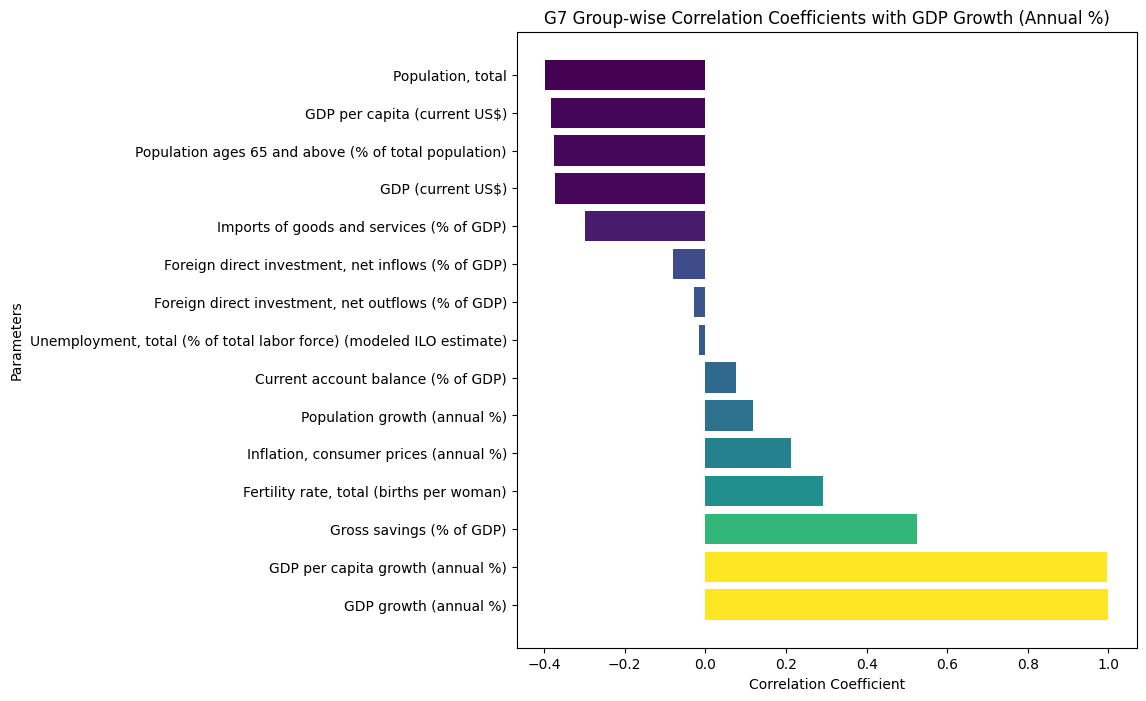

In [61]:
# Create a figure and axis object for the G7 group-wise correlation
fig2, ax2 = plt.subplots(figsize=(8, 8))  # Create a subplot

# Get the sorted correlation values
sorted_values = g7_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False)

# Create a color gradient based on the correlation values
colors = plt.cm.viridis((sorted_values - sorted_values.min()) / (sorted_values.max() - sorted_values.min()))

# Horizontal bar plot with gradient colors
ax2.barh(sorted_values.index, sorted_values.values, color=colors)  # Horizontal bar plot with gradient colors

# Set title and labels
ax2.set_title('G7 Group-wise Correlation Coefficients with GDP Growth (Annual %)')  # Set title
ax2.set_xlabel('Correlation Coefficient')  # Set x-axis label
ax2.set_ylabel('Parameters')  # Set y-axis label

plt.show()  # Display the plot

In [62]:
# Calculate correlation matrix for BRICS group
brics_corr_matrix = df_melted[df_melted['Country Group'] == 'BRICS'].pivot_table(index='Year', columns='Parameters', values='Value').corr()
print(brics_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False))  # Display correlation coefficients for BRICS

Parameters
GDP growth (annual %)                                                      1
GDP per capita growth (annual %)                                        0.97
Gross savings (% of GDP)                                                0.44
Foreign direct investment, net inflows (% of GDP)                       0.42
Foreign direct investment, net outflows (% of GDP)                      0.37
Current account balance (% of GDP)                                      0.26
Imports of goods and services (% of GDP)                                0.24
Unemployment, total (% of total labor force) (modeled ILO estimate)    0.054
Fertility rate, total (births per woman)                              -0.016
Population, total                                                     -0.017
GDP per capita (current US$)                                          -0.021
Population ages 65 and above (% of total population)                  -0.069
Population growth (annual %)                                     

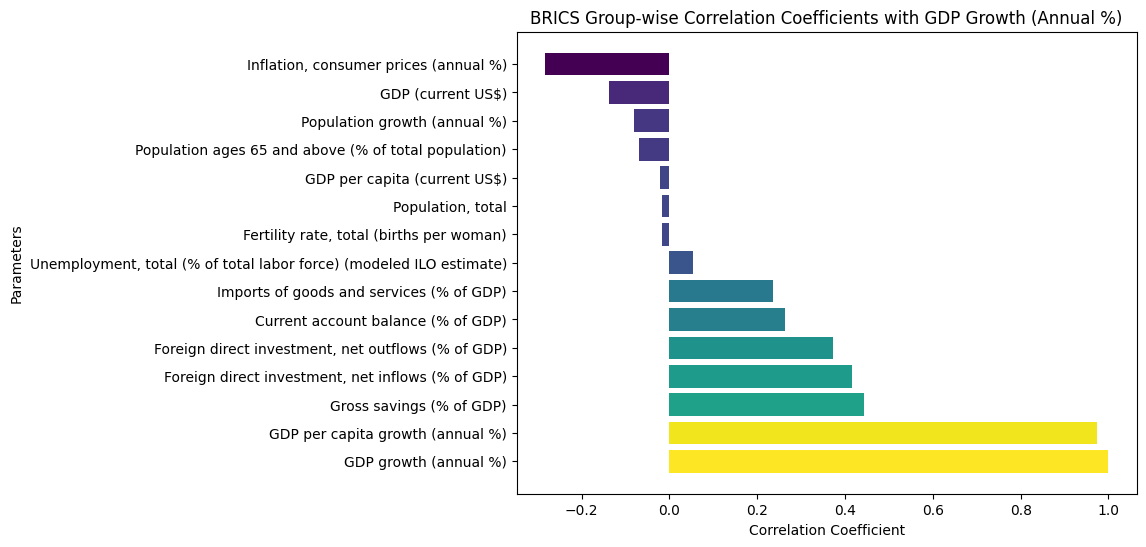

In [63]:
# Create a figure and axis object for the BRICS group-wise correlation
fig3, ax3 = plt.subplots(figsize=(8, 6))  # Create a subplot

# Get the sorted correlation values
sorted_values_brics = brics_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False)

# Create a color gradient based on the correlation values
colors_brics = plt.cm.viridis((sorted_values_brics - sorted_values_brics.min()) / (sorted_values_brics.max() - sorted_values_brics.min()))

# Horizontal bar plot with gradient colors
ax3.barh(sorted_values_brics.index, sorted_values_brics.values, color=colors_brics)  # Horizontal bar plot with gradient colors

# Set title and labels
ax3.set_title('BRICS Group-wise Correlation Coefficients with GDP Growth (Annual %)')  # Set title
ax3.set_xlabel('Correlation Coefficient')  # Set x-axis label
ax3.set_ylabel('Parameters')  # Set y-axis label

plt.show()  # Display the plot

In [64]:
# Calculate time-series correlation between GDP growth (annual %) and other parameters
ts_corr_matrix = df_melted.pivot_table(index='Year', columns='Parameters', values='Value').corr().rolling(window=5).mean()
print(ts_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False))  # Display time-series correlation coefficients

Parameters
Imports of goods and services (% of GDP)                                 0.4
Gross savings (% of GDP)                                                0.38
GDP per capita growth (annual %)                                        0.33
GDP growth (annual %)                                                   0.25
Inflation, consumer prices (annual %)                                   0.19
Population ages 65 and above (% of total population)                    0.18
GDP per capita (current US$)                                            0.15
GDP (current US$)                                                        0.1
Population growth (annual %)                                           0.021
Unemployment, total (% of total labor force) (modeled ILO estimate)   -0.093
Population, total                                                      -0.12
Current account balance (% of GDP)                                       NaN
Fertility rate, total (births per woman)                         

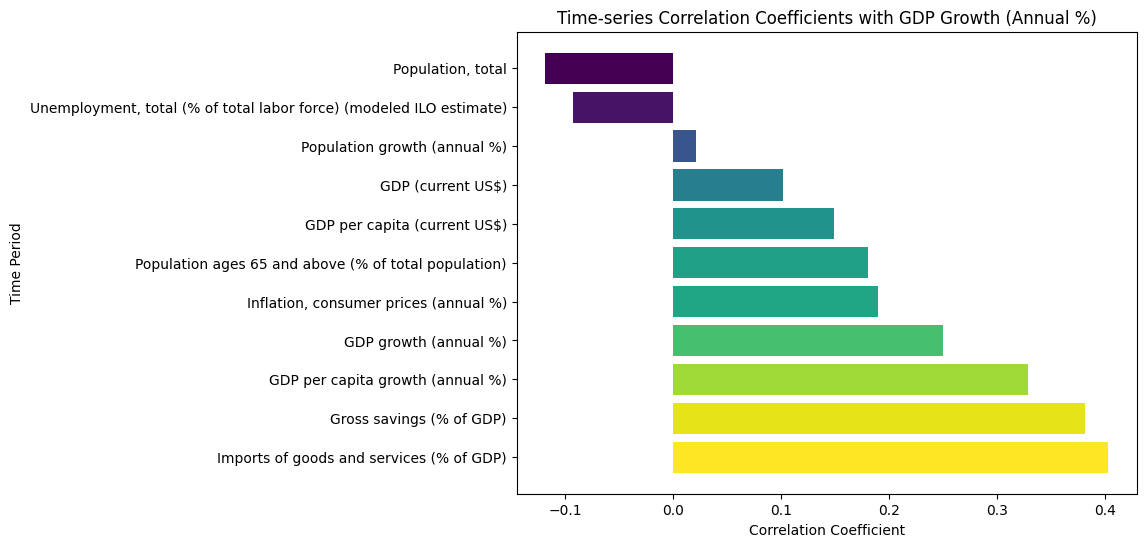

In [65]:
# Create a figure and axis object for the time-series correlation
fig4, ax4 = plt.subplots(figsize=(8, 6))  # Create a subplot

# Get the sorted correlation values
sorted_values_ts = ts_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False)

# Create a color gradient based on the correlation values
colors_ts = plt.cm.viridis((sorted_values_ts - sorted_values_ts.min()) / (sorted_values_ts.max() - sorted_values_ts.min()))

# Horizontal bar plot with gradient colors
ax4.barh(sorted_values_ts.index, sorted_values_ts.values, color=colors_ts)  # Horizontal bar plot with gradient colors

# Set title and labels
ax4.set_title('Time-series Correlation Coefficients with GDP Growth (Annual %)')  # Set title
ax4.set_xlabel('Correlation Coefficient')  # Set x-axis label
ax4.set_ylabel('Time Period')  # Set y-axis label

plt.show()  # Display the plot

In [67]:
# Display unique parameters in the melted DataFrame
df_melted['Parameters'].unique()

array(['Current account balance (% of GDP)',
       'Fertility rate, total (births per woman)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Foreign direct investment, net outflows (% of GDP)',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Gross savings (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Inflation, consumer prices (annual %)',
       'Population ages 65 and above (% of total population)',
       'Population growth (annual %)', 'Population, total',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype=object)

In [68]:
# Define the parameters that influence the GDP growth (annual %) for each group
g7_influencing_params =   [  'GDP per capita growth (annual %)',     
                             'Fertility rate, total (births per woman)',
                             'Gross savings (% of GDP)',                             
                             'Inflation, consumer prices (annual %)',
                             'Population growth (annual %)' ]

brics_influencing_params =  ['GDP per capita growth (annual %)',       
                             'Imports of goods and services (% of GDP)',
                             'Inflation, consumer prices (annual %)',
                             'Foreign direct investment, net outflows (% of GDP)',
                             'Current account balance (% of GDP)']
  

In [69]:
                           
# Function to prepare data for modeling
def prepare_data(df_melted, influencing_params):
    # Filter the data to only consider the specified parameters
    df_melted = df_melted[df_melted['Parameters'].isin(influencing_params)]
    
    # Initialize an empty list to store outliers
    outliers = []
    
    # Iterate over each unique parameter
    for param in df_melted['Parameters'].unique():
        # Filter the data for the current parameter
        param_df = df_melted[df_melted['Parameters'] == param]
        
        # Calculate the Q1 and Q3 for the current parameter
        Q1 = param_df['Value'].quantile(0.25)
        Q3 = param_df['Value'].quantile(0.75)
        
        # Calculate the IQR for the current parameter
        IQR = Q3 - Q1
        
        # Identify outliers for the current parameter
        param_outliers = param_df[(param_df['Value'] < Q1 - 1.5 * IQR) | (param_df['Value'] > Q3 + 1.5 * IQR)]
        
        # Append the outliers to the list
        outliers.append(param_outliers)
    
    # Concatenate the outliers into a single DataFrame
    outliers_df = pd.concat(outliers, ignore_index=True)
    
    # Remove outliers from the original DataFrame
    df_melted = pd.concat([df_melted, outliers_df]).drop_duplicates(keep=False)
    
    # Prepare the data for training
    X = df_melted[['Year']]
    y = df_melted['Value']
    
    # Scale the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled.ravel(), test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, scaler_X, scaler_y, outliers_df

In [70]:
# Function to train models and perform hyperparameter tuning
def train_model(X_train, y_train):
    models = {
        'Random Forest': RandomForestRegressor(),
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'SVR': SVR(),
        'KNN': KNeighborsRegressor()
    }
    
    hyperparameters = {
        'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]},
        'Linear Regression': {'fit_intercept': [True, False]},
        'Decision Tree': {'max_depth': [None, 5, 10]},
        'SVR': {'C': [1, 10, 100], 'epsilon': [0.1, 0.5, 1]},
        'KNN': {'n_neighbors': [3, 5, 10]}
    }
    
    results = {}
    for name, model in models.items():
        grid_search = GridSearchCV(model, hyperparameters[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        results[name] = grid_search.best_estimator_  # Store the best model for each algorithm
    return results

In [71]:
# Prepare data for G7 and BRICS groups
g7_X_train, g7_X_test, g7_y_train, g7_y_test, g7_scaler_X, g7_scaler_y, g7_outliers_df = prepare_data(g7_df, g7_influencing_params)
g7_models = train_model(g7_X_train, g7_y_train)

brics_X_train, brics_X_test, brics_y_train, brics_y_test, brics_scaler_X, brics_scaler_y, brics_outliers_df = prepare_data(brics_df, brics_influencing_params)
brics_models = train_model(brics_X_train, brics_y_train)

In [72]:
# Evaluate models for G7 and calculate mean squared error
g7_results = {}
for name, model in g7_models.items():
    y_pred = model.predict(g7_X_test)
    g7_results[name] = mean_squared_error(g7_y_test, y_pred)

# Evaluate models for BRICS and calculate mean squared error
brics_results = {}
for name, model in brics_models.items():
    y_pred = model.predict(brics_X_test)
    brics_results[name] = mean_squared_error(brics_y_test, y_pred)

In [73]:
# Identify the best model for G7 and BRICS based on MSE
g7_best_model = min(g7_results, key=g7_results.get)
brics_best_model = min(brics_results, key=brics_results.get)

# Print the best models for G7 and BRICS
print("Best model for G7:", g7_best_model)
print("Best model for BRICS:", brics_best_model)

Best model for G7: SVR
Best model for BRICS: Linear Regression


In [74]:
# Use the best models to make predictions for the years 2023 to 2030
years = np.arange(2023, 2031).reshape(-1, 1)

# Scale the years for prediction
g7_years_scaled = g7_scaler_X.transform(years)
brics_years_scaled = brics_scaler_X.transform(years)

# Make predictions using the best models
g7_best_model_instance = g7_models[g7_best_model]
g7_pred_scaled = g7_best_model_instance.predict(g7_years_scaled)

brics_best_model_instance = brics_models[brics_best_model]
brics_pred_scaled = brics_best_model_instance.predict(brics_years_scaled)

C:\Users\Saurav Sahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

C:\Users\Saurav Sahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [75]:
# Convert the predictions back to the original units
g7_pred = g7_scaler_y.inverse_transform(g7_pred_scaled.reshape(-1, 1))
brics_pred = brics_scaler_y.inverse_transform(brics_pred_scaled.reshape(-1, 1))

In [76]:
# Print the predicted values for G7 and BRICS
print("Predicted average GDP growth (annual %) for G7 from 2023 to 2030:")
print(g7_pred)

Predicted average GDP growth (annual %) for G7 from 2023 to 2030:
[[4.79772428]
 [4.77088027]
 [4.74222381]
 [4.71394523]
 [4.6883373 ]
 [4.6675928 ]
 [4.6536232 ]
 [4.6479145 ]]


In [77]:
print("Predicted average GDP growth (annual %) for BRICS from 2023 to 2030:")
print(brics_pred)

Predicted average GDP growth (annual %) for BRICS from 2023 to 2030:
[[6.57415228]
 [6.60456335]
 [6.63497442]
 [6.66538549]
 [6.69579656]
 [6.72620763]
 [6.7566187 ]
 [6.78702977]]


In [78]:
# Create a table to display the predicted values
table = pd.DataFrame({'Year': years.flatten(), 'G7': g7_pred.flatten(), 'BRICS': brics_pred.flatten()})
print(table)

   Year  G7  BRICS
0  2023 4.8    6.6
1  2024 4.8    6.6
2  2025 4.7    6.6
3  2026 4.7    6.7
4  2027 4.7    6.7
5  2028 4.7    6.7
6  2029 4.7    6.8
7  2030 4.6    6.8


In [79]:
# Print the outliers for G7 and BRICS
print("G7 Outliers:")
g7_outliers_df

G7 Outliers:


,Country Name,Country Code,Parameters,Year,Value,Country Group
0,Japan,JPN,GDP per capita growth (annual %),1972,6.9,G7
1,Canada,CAN,GDP per capita growth (annual %),1982,-4.3,G7
2,Canada,CAN,GDP per capita growth (annual %),1991,-3.3,G7
3,United States,USA,GDP per capita growth (annual %),2009,-3.4,G7
4,United Kingdom,GBR,GDP per capita growth (annual %),2009,-5.3,G7
5,Italy,ITA,GDP per capita growth (annual %),2009,-5.7,G7
6,Canada,CAN,GDP per capita growth (annual %),2009,-4,G7
7,Japan,JPN,GDP per capita growth (annual %),2009,-5.7,G7
8,France,FRA,GDP per capita growth (annual %),2009,-3.4,G7
9,Germany,DEU,GDP per capita growth (annual %),2009,-5.5,G7


In [80]:
print("BRICS Outliers:")
brics_outliers_df

BRICS Outliers:


,Country Name,Country Code,Parameters,Year,Value,Country Group
0,Russian Federation,RUS,Current account balance (% of GDP),1999,12,BRICS
1,Russian Federation,RUS,Current account balance (% of GDP),2000,17,BRICS
2,Russian Federation,RUS,Current account balance (% of GDP),2001,10,BRICS
3,Russian Federation,RUS,Current account balance (% of GDP),2004,9.9,BRICS
4,Russian Federation,RUS,Current account balance (% of GDP),2005,11,BRICS
...,...,...,...,...,...,...
70,Russian Federation,RUS,"Inflation, consumer prices (annual %)",1995,2e+02,BRICS
71,Brazil,BRA,"Inflation, consumer prices (annual %)",1995,66,BRICS
72,Russian Federation,RUS,"Inflation, consumer prices (annual %)",1996,48,BRICS
73,Russian Federation,RUS,"Inflation, consumer prices (annual %)",1999,86,BRICS


In [81]:
# Save the outliers to CSV files
g7_outliers_df.to_csv('g7_outliers.csv', index=False)
brics_outliers_df.to_csv('brics_outliers.csv', index=False)

# Save the predicted values to CSV files
table.to_csv('predicted_values.csv', index=False)

C:\Users\Saurav Sahu\AppData\Local\Temp\ipykernel_14556\2051424296.py:8: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



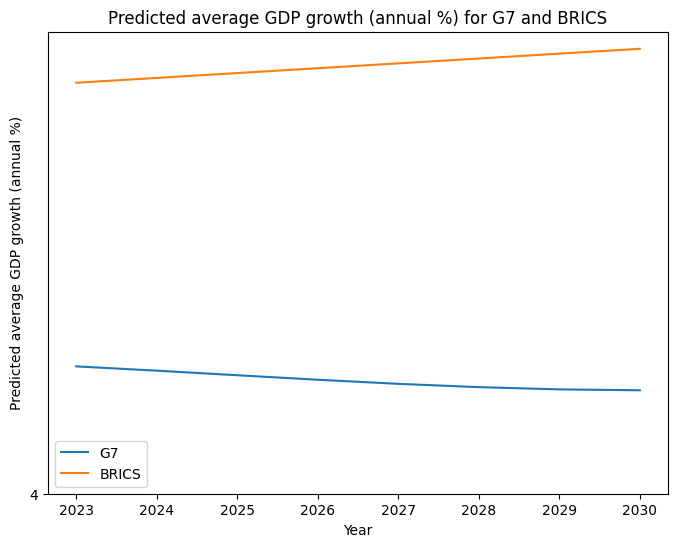

In [82]:
# Plot the predicted values for G7 and BRICS
plt.figure(figsize=(8,6))
plt.plot(years, g7_pred, label='G7')  # Plot G7 predictions
plt.plot(years, brics_pred, label='BRICS')  # Plot BRICS predictions
plt.xlabel('Year')  # Set x-axis label
plt.ylabel('Predicted average GDP growth (annual %)')  # Set y-axis label
plt.title('Predicted average GDP growth (annual %) for G7 and BRICS')  # Set plot title
plt.yticks(range(int(min(min(g7_pred), min(brics_pred))), int(max(max(g7_pred), max(brics_pred))) + 1, 10))  # Set y-ticks
plt.legend()  # Show legend
plt.show()  # Display the plot

In [83]:
# Create a table to display the predicted values
table = pd.DataFrame({'Year': years.flatten(), 'G7': g7_pred.flatten(), 'BRICS': brics_pred.flatten()})
print(tabulate(table, headers='keys', tablefmt='psql'))  # Print the table in a formatted way

+----+--------+---------+---------+
|    |   Year |      G7 |   BRICS |
|----+--------+---------+---------|
|  0 |   2023 | 4.79772 | 6.57415 |
|  1 |   2024 | 4.77088 | 6.60456 |
|  2 |   2025 | 4.74222 | 6.63497 |
|  3 |   2026 | 4.71395 | 6.66539 |
|  4 |   2027 | 4.68834 | 6.6958  |
|  5 |   2028 | 4.66759 | 6.72621 |
|  6 |   2029 | 4.65362 | 6.75662 |
|  7 |   2030 | 4.64791 | 6.78703 |
+----+--------+---------+---------+


In [84]:
# Print the summary of the results
print("Summary of the results:")
print(tabulate([["Best model for G7", g7_best_model], ["Best model for BRICS", brics_best_model]], headers=['Category', 'Model'], tablefmt='psql'))  # Summary of best models
print(tabulate([["Predicted average GDP growth (annual %) for G7 from 2023 to 2030"] + list(g7_pred)], headers=['Category'] + list(years.flatten()), tablefmt='psql'))  # G7 predictions
print(tabulate([["Predicted average GDP growth (annual %) for BRICS from 2023 to 2030"] + list(brics_pred)], headers=['Category'] + list(years.flatten()), tablefmt='psql'))  # BRICS predictions

Summary of the results:
+----------------------+-------------------+
| Category             | Model             |
|----------------------+-------------------|
| Best model for G7    | SVR               |
| Best model for BRICS | Linear Regression |
+----------------------+-------------------+
+------------------------------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+
| Category                                                         |    2023 |    2024 |    2025 |    2026 |    2027 |    2028 |    2029 |    2030 |
|------------------------------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------|
| Predicted average GDP growth (annual %) for G7 from 2023 to 2030 | 4.79772 | 4.77088 | 4.74222 | 4.71395 | 4.68834 | 4.66759 | 4.65362 | 4.64791 |
+------------------------------------------------------------------+---------+---------+---------+---------+--